In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import io
import requests
import math

# load data
req = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data").content
adult = pd.read_csv(io.StringIO(req.decode('utf-8')), header=None, na_values='?', delimiter=r", ")
adult.dropna()
adult.head()

# the domains
domain = np.arange(10, 101)
domain.sort()
domain

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

Text(0.5, 0, 'Ages')

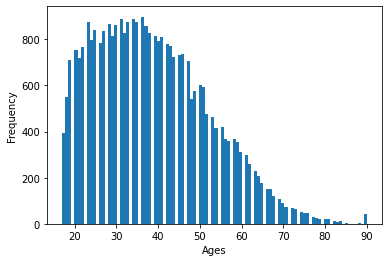

In [ ]:
# the ages of people
adult_age = adult[0].dropna()
ax = adult_age.plot.hist(bins=100, alpha=1.0)
plt.xlabel('Ages')


In [ ]:
# histogram encoding - encoding
def encoding(answer):
    return [1.0 if d == answer else 0.0 for d in domain]

# test the encoding
print(encoding(11))

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 0, 'Ages')

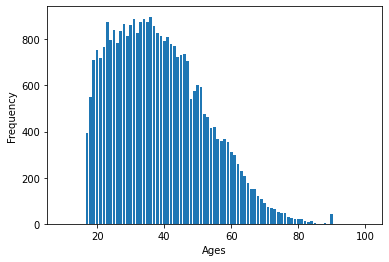

In [ ]:
# data encoding
answers = np.sum([encoding(r) for r in adult_age], axis=0)
plt.bar(domain, answers)
plt.ylabel('Frequency')
plt.xlabel('Ages')

In [ ]:
# Summation with Histogram Encoding - perturbation
def she_perturbation(encoded_ans, epsilon = 5.0):
    return [she_perturb_bit(b, epsilon) for b in encoded_ans]

def she_perturb_bit(bit, epsilon = 5.0):
    return bit + np.random.laplace(loc=0, scale = 2 / epsilon)

# test the perturbation, epsilon = 5.0
print(she_perturbation(encoding(11)))
print()

# test the perturbation, epsilon = .1
print(she_perturbation(encoding(11), epsilon = .1))

[-0.25294433337222055, 1.2560660378135848, -0.3406380759723715, 0.4594603418315362, 1.1448518237498502, -0.2001697854999237, 0.5124262446289104, 0.14883271670653722, 0.07439814683055332, 0.4196411878076538, 0.3166549360797435, 0.05271470430123383, -0.2380288871662249, 0.12927697630788682, 1.0610606977213572, 0.04321374407475653, 0.7134688896315136, 0.22892151273012507, 0.12263239473054438, -0.18530209504882902, 0.20557821463504597, -0.13593342528924082, -0.08285066090884995, -0.6180746275792965, 0.065043772198649, 1.0147575827084656, 1.3014896498820823, 0.09905004561093611, -0.16686898289085883, -0.667656318020352, 0.09726474016240798, -0.0960472077622372, 0.6127350691763812, -0.20468200583785842, 0.24707868260497556, 0.10332593774842046, 0.059758028184712236, -0.09842838010375289, 0.049845036371913155, 0.21335122572137674, 0.0897509186294261, -0.06812407323537688, 0.5372285669540384, 0.21008436234499356, 0.06156761609878014, 0.30925097247982064, 0.0022735899383479656, -0.2633632964293

Text(0.5, 0, 'Ages')

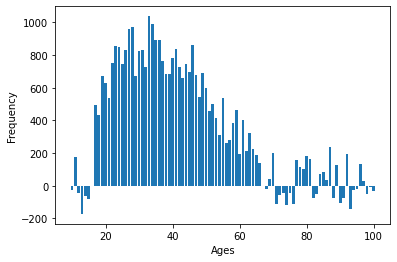

In [ ]:
# data perturbation, aggregation and estimation
she_estimated_answers = np.sum([she_perturbation(encoding(r)) for r in adult_age], axis=0)
plt.bar(domain, she_estimated_answers)
plt.ylabel('Frequency')
plt.xlabel('Ages')

Text(0.5, 0, 'Ages')

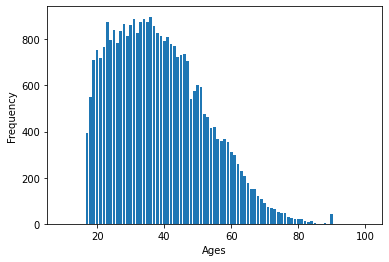

In [ ]:
# the actual result
plt.bar(domain, answers)
plt.ylabel('Frequency')
plt.xlabel('Ages')

In [ ]:
################################################################################

In [ ]:
# Thresholding with Histogram Encoding - perturbation
def the_perturbation(encoded_ans, epsilon = 5.0, theta = 1.0):
    return [the_perturb_bit(b, epsilon, theta) for b in encoded_ans]

def the_perturb_bit(bit, epsilon = 5.0, theta = 1.0):
    val = bit + np.random.laplace(loc=0, scale = 2 / epsilon)

    if val > theta:
        return 1.0
    else:
        return 0.0

# test the perturbation, epsilon = 5.0
print(the_perturbation(encoding(11)))
print()

# test the perturbation, epsilon = .1
print(the_perturbation(encoding(11), epsilon = .1))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]


Text(0.5, 0, 'Ages')

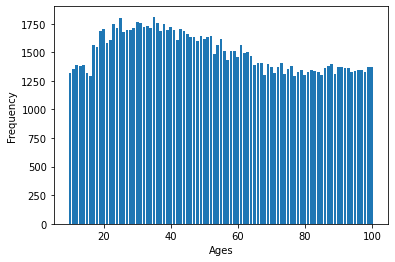

In [ ]:
# data perturbation
the_perturbed_answers = np.sum([the_perturbation(encoding(r)) for r in adult_age], axis=0)
plt.bar(domain, the_perturbed_answers)
plt.ylabel('Frequency')
plt.xlabel('Ages')

Text(0.5, 0, 'Ages')

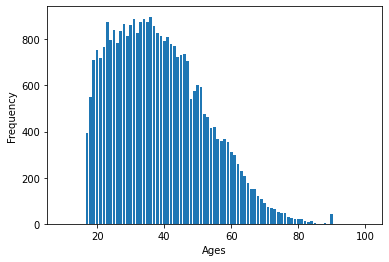

In [ ]:
# the actual result
plt.bar(domain, answers)
plt.ylabel('Frequency')
plt.xlabel('Ages')

In [ ]:
# Thresholding with Histogram Encoding - aggregation and estimation
def the_aggregation_and_estimation(answers, epsilon = 5.0, theta = 1.0):
    p = 1 - 0.5 * pow(math.e, epsilon / 2 * (1.0 - theta))
    q = 0.5 * pow(math.e, epsilon / 2 * (0.0 - theta))
    
    sums = np.sum(answers, axis=0)
    n = len(answers)
    
    return [int((i - n * q) / (p-q)) for i in sums]  

Text(0.5, 0, 'Ages')

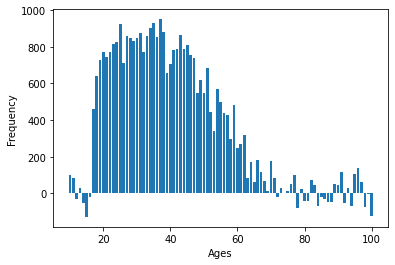

In [ ]:
# data aggregation and estimation
the_perturbed_answers = [the_perturbation(encoding(r)) for r in adult_age]
estimated_answers = the_aggregation_and_estimation(the_perturbed_answers)
plt.bar(domain, estimated_answers)
plt.ylabel('Frequency')
plt.xlabel('Ages')

Text(0.5, 0, 'Ages')

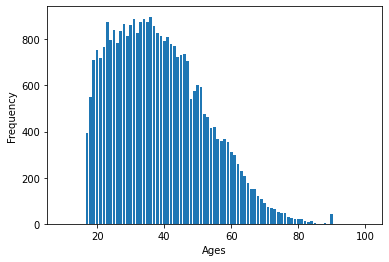

In [ ]:
# the actual result
plt.bar(domain, answers)
plt.ylabel('Frequency')
plt.xlabel('Ages')